# The market of public catering establishments in Moscow

## Project description  <a id="1"></a>
</div>

A small cafe opens in Moscow. It is original-the guests must be served by robots. The project is promising, but expensive. Together with your partners, you decided to turn to investors. They are interested in the current state of affairs in the market — will you be able to gain popularity for a long time, when all the onlookers will see enough of the robot waiters?
You are an analytics guru, and the partners ask you to prepare a market study. You have open data about public catering establishments in Moscow.

- [Описание проекта](#1)  
- [Установка библиотек, чтение файла, подготовка данных к анализу](#2)  
- [Анализ данных](#3)
- [Вывод](#4)

## Установка библиотек, чтение файла, подготовка данных к анализу. <a id="2"></a> 

In [1]:
!pip install seaborn==0.11.0

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
import datetime
import plotly.express as px 
import re
import requests
from bs4 import BeautifulSoup

In [3]:
rest_data = pd.read_csv('/datasets/rest_data.csv')

In [4]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


Пропущенных значений нет, все данные приведены к нужному типу.

In [5]:
rest_data.duplicated().sum()

0

Полные дубликаты отсутсвуют

In [6]:
rest_data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


## Анализ данных <a id="3"></a> 

### Исследуем соотношение видов объектов общественного питания по количеству. Построим график.

In [7]:
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [8]:
rest_data_1 = rest_data.groupby('object_type').count().reset_index().sort_values('id', ascending=False)

In [9]:
rest_data_1.head()

,object_type,id,object_name,chain,address,number
3,кафе,6099,6099,6099,6099,6099
8,столовая,2587,2587,2587,2587,2587
7,ресторан,2285,2285,2285,2285,2285
6,предприятие быстрого обслуживания,1923,1923,1923,1923,1923
0,бар,856,856,856,856,856


Text(0.5, 1.0, 'соотношение видов объектов общественного питания по количеству')

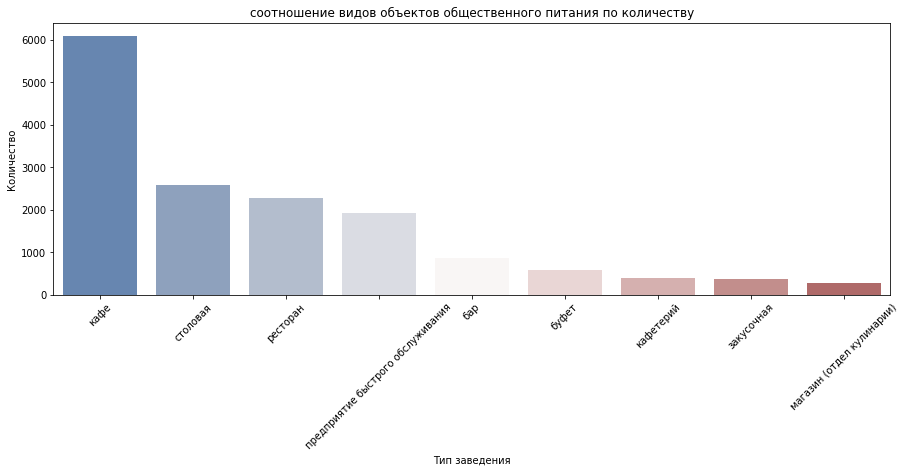

In [10]:
plt.figure(figsize=(15, 5))
plot = sns.barplot(data=rest_data_1, x='object_type', y='id', palette = 'vlag')
plt.xticks(rotation=45)
sns.set_palette('dark') 
plot.set_xlabel('Тип заведения')
plot.set_ylabel('Количество') 
sns.set_style("whitegrid") 

plt.title('соотношение видов объектов общественного питания по количеству')

На графике, как и в таблице можно заметить, что самым популярным типом заведения является с большим отрывом кафе, после него идет столовая. На последнем месте по популярности находится отдел кулинарии, чуть выше закусочная. 


### соотношение сетевых и несетевых заведений по количеству

In [11]:
rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

Text(0.5, 1.0, 'соотношение сетевых и несетевых заведений по количеству')

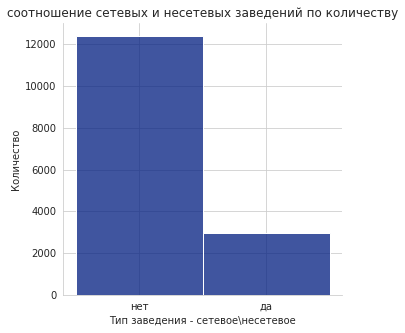

In [12]:
plt.figure(figsize=(5, 5))
plot = sns.histplot(data=rest_data, x='chain', palette = 'vlag')
plt.xticks(rotation=0)

plot.set_xlabel('Тип заведения - сетевое\несетевое')
plot.set_ylabel('Количество') 
sns.set_style("whitegrid") 
sns.despine() 
plt.title('соотношение сетевых и несетевых заведений по количеству')

Несетевых заведений больше, чем в 4 раза

### Для какого вида объекта общественного питания характерно сетевое распространение?

Text(0.5, 1.0, 'соотношение видов объектов общественного питания по количеству')

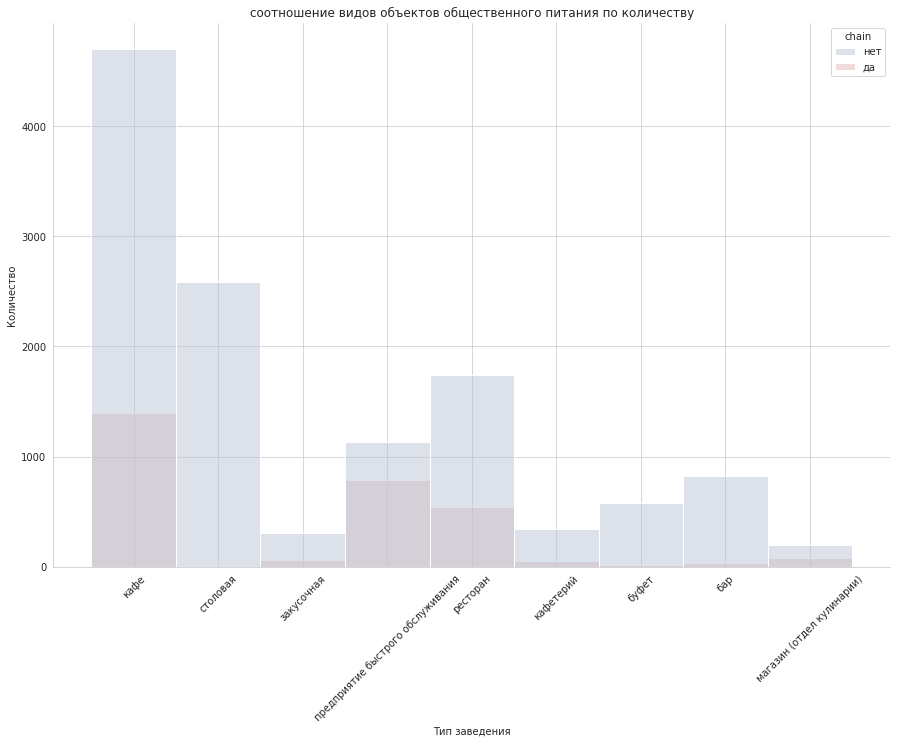

In [13]:
plt.figure(figsize=(15, 10))
plot = sns.histplot(data=rest_data, x='object_type', hue='chain', palette="vlag")
plt.xticks(rotation=45)
plot.set_xlabel('Тип заведения')
plot.set_ylabel('Количество') 
sns.set_style("whitegrid") 
sns.despine() 

plt.title('соотношение видов объектов общественного питания по количеству')

In [14]:
rest_data_chain = rest_data

In [15]:
rest_data_chain['chain_true'] = rest_data_chain['chain'] == 'да'

In [16]:
rest_data_chain.head()

,id,object_name,chain,object_type,address,number,chain_true
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,False
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,False
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,True
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,False


In [17]:
rest_data_chain.groupby('object_type').agg({'chain_true': 'mean'}).reset_index().sort_values('chain_true', ascending=False)

,object_type,chain_true
6,предприятие быстрого обслуживания,0.411336
5,магазин (отдел кулинарии),0.285714
7,ресторан,0.238074
3,кафе,0.228890
2,закусочная,0.155556
4,кафетерий,0.130653
0,бар,0.043224
1,буфет,0.018803
8,столовая,0.001160


Text(0.5, 1.0, 'соотношение видов объектов общественного питания по количеству')

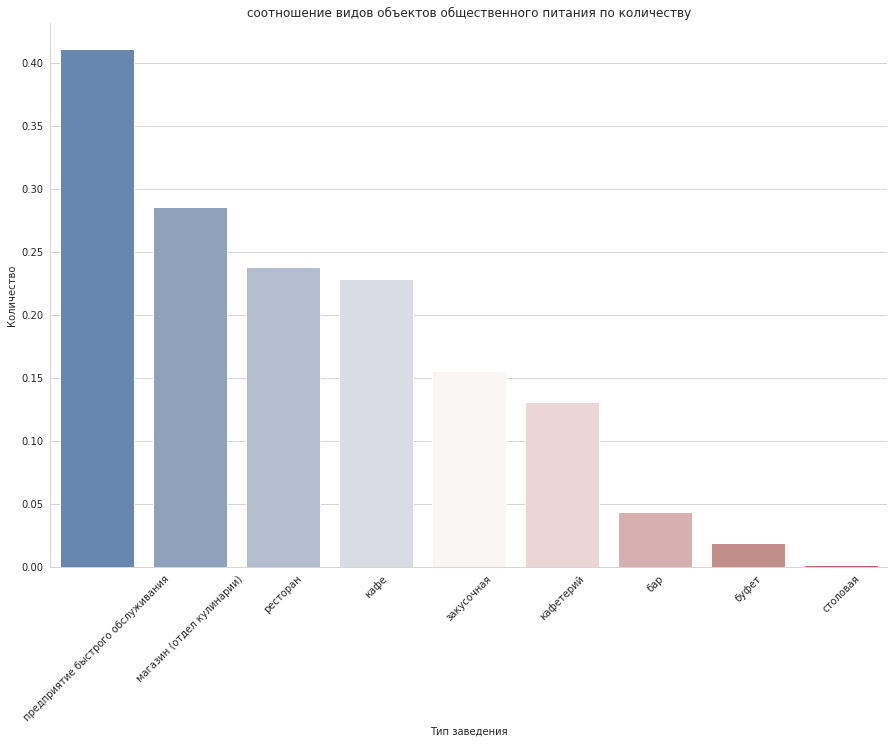

In [18]:
plt.figure(figsize=(15, 10))
plot = sns.barplot(data=rest_data_chain.groupby('object_type').agg({'chain_true': 'mean'}).reset_index().sort_values('chain_true', ascending=False), x='object_type', y='chain_true', palette="vlag")
plt.xticks(rotation=45)
plot.set_xlabel('Тип заведения')
plot.set_ylabel('Количество') 
sns.set_style("whitegrid") 
sns.despine() 

plt.title('соотношение видов объектов общественного питания по количеству')

Благодаря графику можно сказать, что самыми распространенными внутри одного типа предприятий сетевыми организациями являются предприятия быстрого обслуживания, после чего идут кафе и рестораны, частично отделы кулинарии. Все остальные варианты станут плохим выбором, либо просто непопулярны.


### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [19]:
chain_data = rest_data.loc[rest_data['chain'] == 'да']

Text(0.5, 1.0, 'количество посадочных мест')

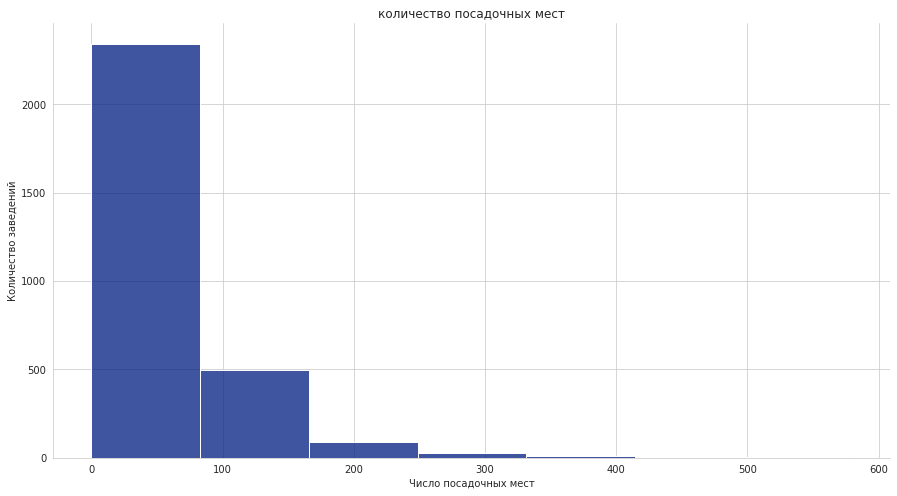

In [20]:
plt.figure(figsize=(15, 8))
plot = sns.histplot(data=chain_data, x='number', palette="vlag", bins=7)
plt.xticks(rotation=0)
plot.set_xlabel('Число посадочных мест')
plot.set_ylabel('Количество заведений') 
sns.set_style("whitegrid") 
sns.despine() 
plt.title('количество посадочных мест')

Основываясь на данном графике, можно сказать, что большинство заведений имеют до 100 посадочных мест.

Text(0.5, 1.0, 'соотношение количества посадочных мест')

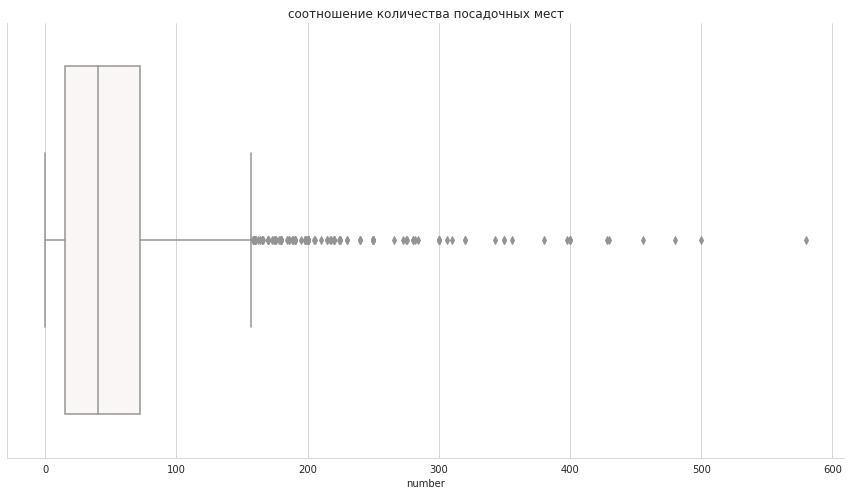

In [21]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="number", data=chain_data, palette ='vlag')
plot.set_xlabel('Число посадочных мест')
plot.set_ylabel('Количество заведений') 
sns.set_style("whitegrid") 
sns.despine() 
plt.title('соотношение количества посадочных мест')

In [22]:
display(chain_data['number'].describe())

count    2968.000000
mean       52.919811
std        57.140644
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

Принимая во внимание график распредления Boxplot и описательную статистику для сетевых заведений, хочу заметить, что среднее я бы использовать не стал, так оно меньше стандартного отклонения, а вот медиана вполне четка показывает, что минимум 50% всех заведений имеют не больше 40 посадочных мест, а не более 25% - 72 места, не так уж много. Но нужно понимать, что сетевых заведений больше всего в ресторанах быстрого обслуживания.


### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

Text(0.5, 1.0, 'соотношение видов объектов общественного питания по количеству посадочных мест')

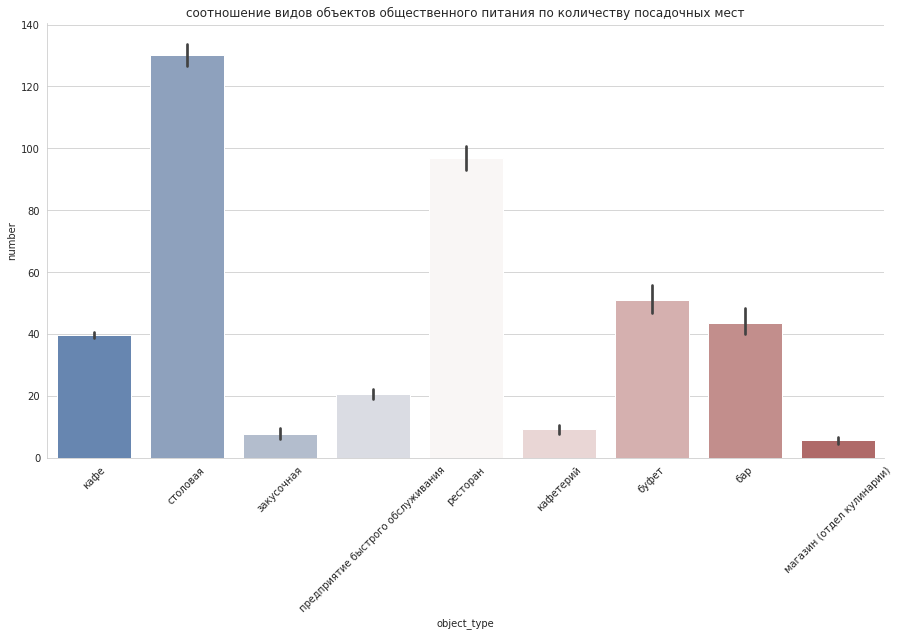

In [23]:
plt.figure(figsize=(15, 8))
sns.barplot(x="object_type", y="number", data=rest_data, palette = 'vlag') 
plot.set_xlabel('Тип заведения')

plt.xticks(rotation=45)
plot.set_ylabel('Число посадочных мест') 
sns.set_style("dark") 
sns.despine() 
plt.title('соотношение видов объектов общественного питания по количеству посадочных мест')

In [24]:
rest_data.groupby('object_type').agg({'number': 'mean'}).round(2).sort_values('number', ascending=False)

,number
object_type,
столовая,130.25
ресторан,96.83
буфет,51.13
бар,43.49
кафе,39.72
предприятие быстрого обслуживания,20.55
кафетерий,9.12
закусочная,7.61
магазин (отдел кулинарии),5.59


Данные поквзывают, что наибольшее количество мест посадочных характерно для столовых и ресторанов, в то время как меньшее количество посадочных мест в кулинариях, закусочных и кафетериях.

### Выделим в отдельный столбец информацию об улице из столбца address

In [25]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

rest_data["street"] = rest_data["address"].str.extract(str_pat, flags=re.I)

In [26]:
rest_data.head()

,id,object_name,chain,object_type,address,number,chain_true,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,False,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,False,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,True,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,False,Абрамцевская улица


### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [27]:
street_data = rest_data.groupby('street').agg({'id': 'nunique'}).sort_values('id', ascending = False).head(10).reset_index()

In [28]:
street_data

,street,id
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,132
7,Кутузовский проспект,114
8,Каширское шоссе,112
9,Кировоградская улица,110


Text(0.5, 1.0, 'Самые популярные улицы')

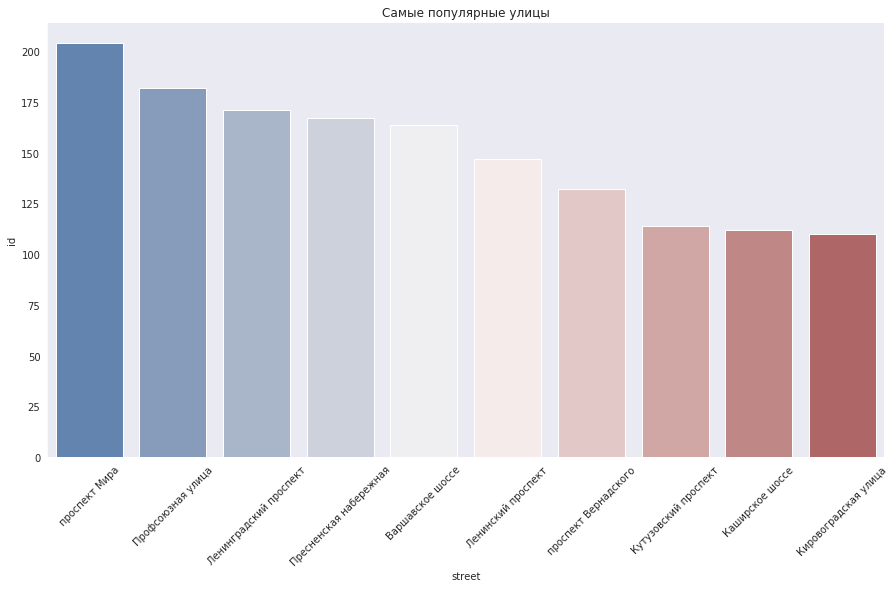

In [29]:
plt.figure(figsize=(15, 8))
sns.barplot(x='street', y="id", data=street_data, palette = 'vlag') 
plot.set_xlabel('Улицы')
plt.xticks(rotation=45)
plot.set_ylabel('Кол-во заведений') 
sns.set_style("whitegrid") 
sns.despine() 
plt.title('Самые популярные улицы')

На этом графике видно, что самые популярные для размещения заведений общественного питания улицами являются Проспект Мира, Профсоюзная и так далее. Удивительно, что прямо совсем центральных улиц немного, в основном это длинные улицы или шоссе, оно и неудивительно, на то они и протяженные. Большая часть из самых популярных улиц располежна в западной части Москвы.


In [30]:
external_streets = pd.read_csv('http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv')
external_streets['streetname'] = external_streets['streetname'].astype('str')
external_streets = external_streets.rename(columns={'streetname': 'street'})

In [31]:
external_streets.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [32]:
rest_data['street'].str.strip()

0         улица Егора Абакумова
1              улица Талалихина
2          Абельмановская улица
3            Абрамцевская улица
4            Абрамцевская улица
                  ...          
15361    3-й Крутицкий переулок
15362        улица Земляной Вал
15363        улица Земляной Вал
15364            Киевское шоссе
15365         Ходынский бульвар
Name: street, Length: 15366, dtype: object

In [33]:
external_streets['street'].str.strip()

0                  Выставочный переулок
1                          улица Гашека
2               Большая Никитская улица
3                     Глубокий переулок
4       Большой Гнездниковский переулок
                     ...               
4393                Вознесенский проезд
4394                    Волков переулок
4395                    Поварская улица
4396                 Кудринская площадь
4397                 Вспольный переулок
Name: street, Length: 4398, dtype: object

In [34]:
df = rest_data.merge(external_streets, how='left', on='street')

In [35]:
df.head()

,id,object_name,chain,object_type,address,number,chain_true,street,areaid,okrug,area
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,False,улица Егора Абакумова,86.0,СВАО,Ярославский Район
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False,улица Талалихина,18.0,ЦАО,Таганский район
2,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False,улица Талалихина,117.0,ЮВАО,Нижегородский район
3,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,False,улица Талалихина,133.0,ЮЗАО,Район Южное Бутово
4,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,False,Абельмановская улица,18.0,ЦАО,Таганский район


In [36]:
street_data.head()

,street,id
0,проспект Мира,204
1,Профсоюзная улица,182
2,Ленинградский проспект,171
3,Пресненская набережная,167
4,Варшавское шоссе,164


In [37]:
df_1 = street_data.merge(external_streets, how='left', on='street')

In [38]:
df_1

,street,id,areaid,okrug,area
0,проспект Мира,204,70,СВАО,Алексеевский район
1,проспект Мира,204,86,СВАО,Ярославский Район
2,проспект Мира,204,78,СВАО,Район Марьина роща
3,проспект Мира,204,79,СВАО,Останкинский район
4,проспект Мира,204,81,СВАО,Район Ростокино
5,проспект Мира,204,82,СВАО,Район Свиблово
6,проспект Мира,204,16,ЦАО,Мещанский район
7,Профсоюзная улица,182,123,ЮЗАО,Академический район
8,Профсоюзная улица,182,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,182,134,ЮЗАО,Район Ясенево


Все эти улицы можно отнести к нескольким районам. Что касается округов, то стоит выделить здесь Южные округа, в них чаще встречаются улицы с большим количеством заведений.

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [39]:
street_data_2 = rest_data.groupby('street').agg({'id': 'nunique'}).sort_values('id', ascending = True).reset_index()

In [40]:
street_data_2 = street_data_2.loc[street_data_2['id'] == 1]

In [41]:
street_data_2.count()

street    551
id        551
dtype: int64

In [42]:
street_data_2.head(10)

,street,id
0,Пенягинская улица,1
1,Малый Полуярославский переулок,1
2,Верхняя улица,1
3,Малый Николопесковский переулок,1
4,Малый Лёвшинский переулок,1
5,Малый Коптевский проезд,1
6,Малый Конюшковский переулок,1
7,Малый Путинковский переулок,1
8,улица Васильцовский Стан,1
9,Малый Каретный переулок,1


In [43]:
street_data_2 = street_data_2.merge(external_streets, how='left', on='street')

In [44]:
street_data_2.head()

,street,id,areaid,okrug,area
0,Пенягинская улица,1,88.0,СЗАО,Район Митино
1,Малый Полуярославский переулок,1,18.0,ЦАО,Таганский район
2,Верхняя улица,1,55.0,САО,Район Беговой
3,Малый Николопесковский переулок,1,12.0,ЦАО,Район Арбат
4,Малый Лёвшинский переулок,1,20.0,ЦАО,Район Хамовники


In [45]:
street_data_2.groupby('area').agg({'street': 'nunique'}).sort_values('street', ascending=False)

,street
area,
Таганский район,27
Район Хамовники,26
Басманный район,25
Тверской район,20
Пресненский район,19
...,...
Алтуфьевский район,1
Район Марьино,1
Район Метрогородок,1


In [46]:
street_data_2.groupby('okrug').agg({'street': 'nunique'}).sort_values('street', ascending=False)

,street
okrug,
ЦАО,175
СВАО,65
ВАО,59
ЮВАО,52
САО,50
ЗАО,45
СЗАО,27
ЮАО,27
ЮЗАО,27


Всего 551 улица с одним заведением. Сложно проверить, где находится каждая улица, да и анализ первых 10 показывает, что они могут быть расположены абсолютно где угодно, но зачастую, такие улицы либо сильно удалены от центра или мест остановки общественного транспорта, либо труднодоступны


V2: Таганский районб Хамовникиб Басманный район, Тверской и пресненский имеют наибольшое количество улиц с одним заведением. Если смотерть по округам, то большая часть таких улиц относится к ЦАО, потом идет СВАО
    

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [47]:
street_data_number = rest_data.groupby('street').agg({'id': 'nunique', 'number': 'mean'}).sort_values('id', ascending = False).head(10).reset_index().round(2)

In [48]:
street_data_number

,street,id,number
0,проспект Мира,204,62.70
1,Профсоюзная улица,182,46.41
2,Ленинградский проспект,171,52.69
3,Пресненская набережная,167,45.84
4,Варшавское шоссе,164,52.48
5,Ленинский проспект,147,63.47
6,проспект Вернадского,132,66.97
7,Кутузовский проспект,114,85.06
8,Каширское шоссе,112,55.10
9,Кировоградская улица,110,59.79


Text(0.5, 1.0, 'Самые популярные улицы и среднее количество посадочных мест')

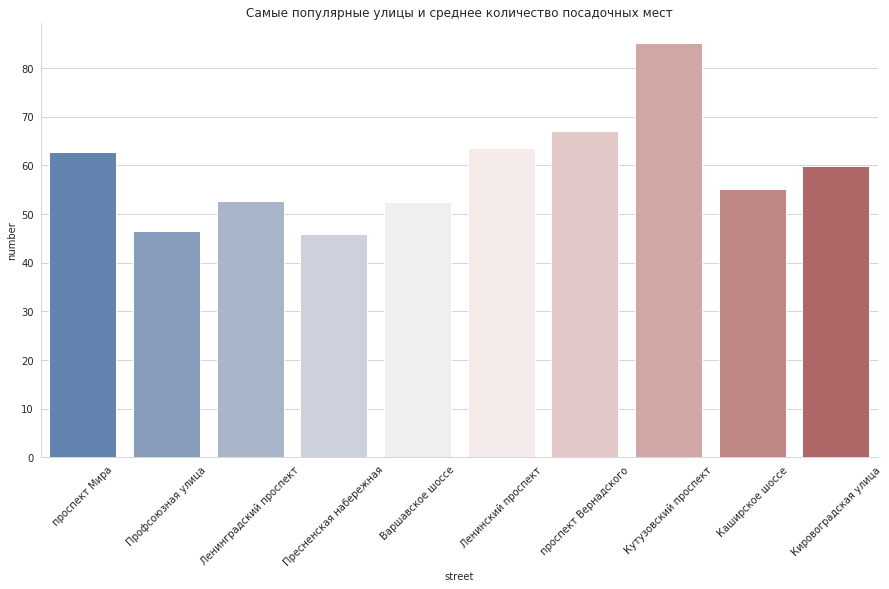

In [49]:
plt.figure(figsize=(15, 8))
sns.barplot(x='street', y="number", data=street_data_number, palette = 'vlag') 
plot.set_xlabel('Улицы')
plt.xticks(rotation=45)
plot.set_ylabel('Кол-во посадочных мест') 
sns.set_style("whitegrid") 
sns.despine() 
plt.title('Самые популярные улицы и среднее количество посадочных мест')

Ну вот можно сказать, что на самых популярных улицах в среднем не так много посадочных мест в одном заведении. Много заведений - много небольших заведений, много ресторанов быстрого питания, в них как правило не очень много посадочных мест, как мы выяснили - в районе 20

## Conclusion <a id="4"></a> 

What can we say after studying the data on catering services:
- the most popular type of institution is a cafe by a large margin, followed by a dining room. In the last place in popularity is the cooking department, just above the diner.
- there are more than 4 times more non-chain establishments (~12,000 vs. ~3,000)
- the most common network organizations within one type of enterprise are fast-food businesses, followed by cafes and restaurants, and partly cooking departments. All other options will become a bad choice, or simply unpopular.
- at least 50% of all establishments have no more than 40 seats, and no more than 25% - 72 seats, not so much. But you need to understand that most of the chain establishments are in fast-food restaurants.
- the largest number of seats is typical for canteens and restaurants, while the smallest number of seats is in cookeries, eateries and cafeterias.
- the most popular streets for placing public catering establishments are Mira Avenue, Trade Union Street, and so on. There are very few central streets, mostly long streets or highways, which is not surprising, because they are long. Most of the most popular streets are located in the western part of Moscow.
- A total of 551 streets with one institution. It is difficult to check where each street is located, and the analysis of the first 10 shows that they can be located absolutely anywhere, but often, such streets are either very far from the center or public transport stops, or difficult to access.
- on the most popular streets, on average, there are not so many seats in one institution. A lot of establishments - a lot of small establishments, a lot of fast food restaurants, they usually do not have very many seats, as we found out - in the region of 20.

Based on the above data, I make a recommendation - it is worth paying attention to a network (less competition) institution of the type of quick service enterprise, if you choose a non-network one, then a cafe or canteen. In the case of the dining room, you need to make more seats, from a hundred, in other cases, you can focus on the median of 40. 50 seats will also be a good choice, no more. If the most popular streets are also the most successful places, then you need to try to find a place there, otherwise, the competition will be very high, I think you need to focus on the average indicator.

link for presentation -  <https://drive.google.com/file/d/1-vf7Q1uQGm2RekrSFYYfH7U3DIHoVuAE/view?usp=sharing> 